In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Loading libraries 

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from pandas_profiling import ProfileReport
from collections import Counter

import  warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style('darkgrid',{"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

# Loading files

In [75]:
netflix_data= pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Checking few random observations

In [76]:
netflix_data.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8403,s8404,Movie,The Look of Silence,Joshua Oppenheimer,NaN,"Denmark, Indonesia, Finland, Norway, United Ki...","February 26, 2016",2014,PG-13,103 min,"Documentaries, International Movies","In a society terrorized into silence, the brot..."
1613,s1614,Movie,Effie Gray,Richard Laxton,"Dakota Fanning, Emma Thompson, Julie Walters, ...",United Kingdom,"December 1, 2020",2014,PG-13,109 min,"Dramas, International Movies, Romantic Movies","Trapped in a loveless marriage, the young wife..."
1593,s1594,TV Show,Kings of Jo'Burg,NaN,"Shona Ferguson, Zolisa Xaluva, Tsholofelo Mats...",South Africa,"December 4, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",The Masire brothers rule Johannesburg's crimin...
3596,s3597,Movie,Hasta los dientes,Alberto Arnaut Estrada,NaN,Mexico,"August 13, 2019",2018,TV-MA,109 min,"Documentaries, International Movies",This documentary follows the controversy surro...
5456,s5457,Movie,Michael Lost and Found,Daniel Wilner,NaN,"Canada, United States","June 1, 2017",2017,TV-PG,19 min,"Documentaries, International Movies, LGBTQ Movies",Benjie Nycum travels to Wyoming to visit his e...
2389,s2390,Movie,Asura Guru,A. Raajdheep,"Vikram Prabhu, Subbaraju, Mahima Nambiar, Yogi...",India,"June 13, 2020",2020,TV-14,117 min,"Dramas, International Movies","For a tech-savvy thief, elaborate robberies an..."
4570,s4571,TV Show,Hot Date,NaN,"Emily Axford, Brian Murphy",United States,"October 1, 2018",2018,TV-MA,1 Season,"Romantic TV Shows, TV Comedies",Interconnected sketches and performances skewe...
7568,s7569,TV Show,Nature: Animals With Cameras,NaN,Gordon Buchanan,"United Kingdom, United States","October 1, 2018",2018,TV-PG,1 Season,"Docuseries, Science & Nature TV",With custom-built cameras attached to their bo...
3957,s3958,Movie,The Trap,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...


# Checking Datatypes and null values 

In [77]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [78]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# EDA & Data Visualization

In [79]:
temp_data=pd.pivot_table(netflix_data,index=['country'],columns=['type'],values=['listed_in'],aggfunc='count')

# Understanding what content is available in different countries

In [80]:
temp_data[ temp_data.index =='India' ]

listed_in        
type        Movie TV Show
country                  
India       893.0    79.0

In [81]:
temp_data[temp_data.index == 'Israel']

listed_in        
type        Movie TV Show
country                  
Israel        5.0     8.0

In [82]:
temp_data[temp_data.index =='Australia']

listed_in        
type          Movie TV Show
country                    
Australia      39.0    48.0

In [83]:
temp_data[temp_data.index =='New Zealand']

listed_in        
type            Movie TV Show
country                      
New Zealand      10.0     2.0

In [84]:
netflix_data.groupby(['type'])[['director','cast','release_year']].nunique()

,director,cast,release_year
type,,,
Movie,4354,5445,73
TV Show,222,2283,46


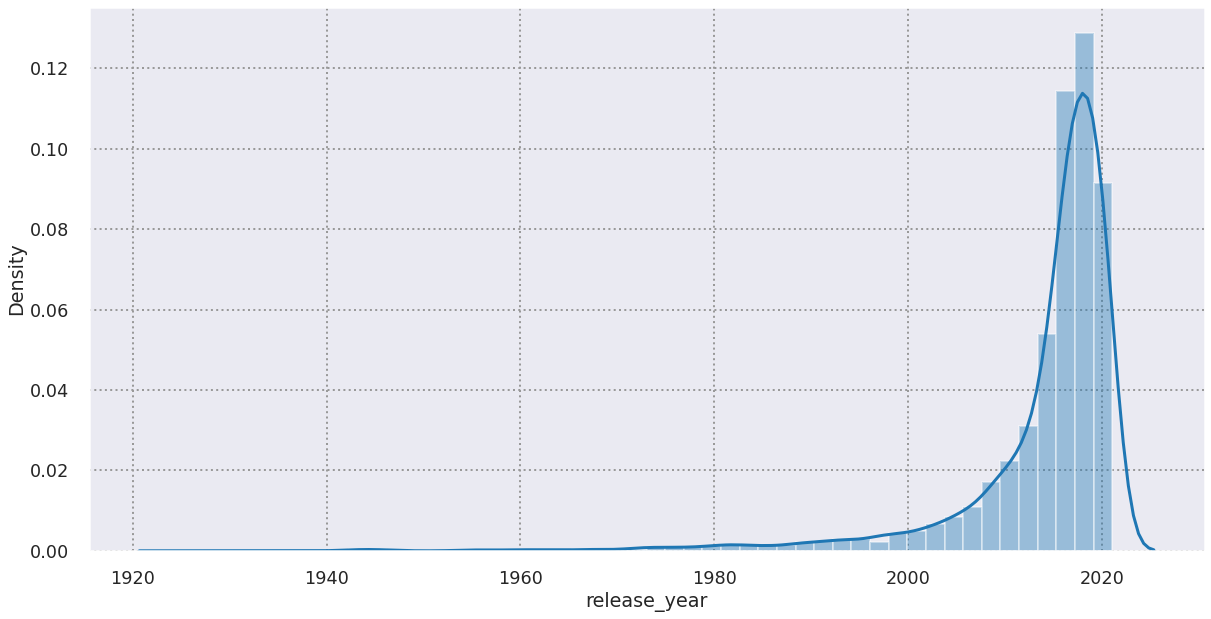

In [85]:
sns.distplot(netflix_data['release_year'])
plt.show()

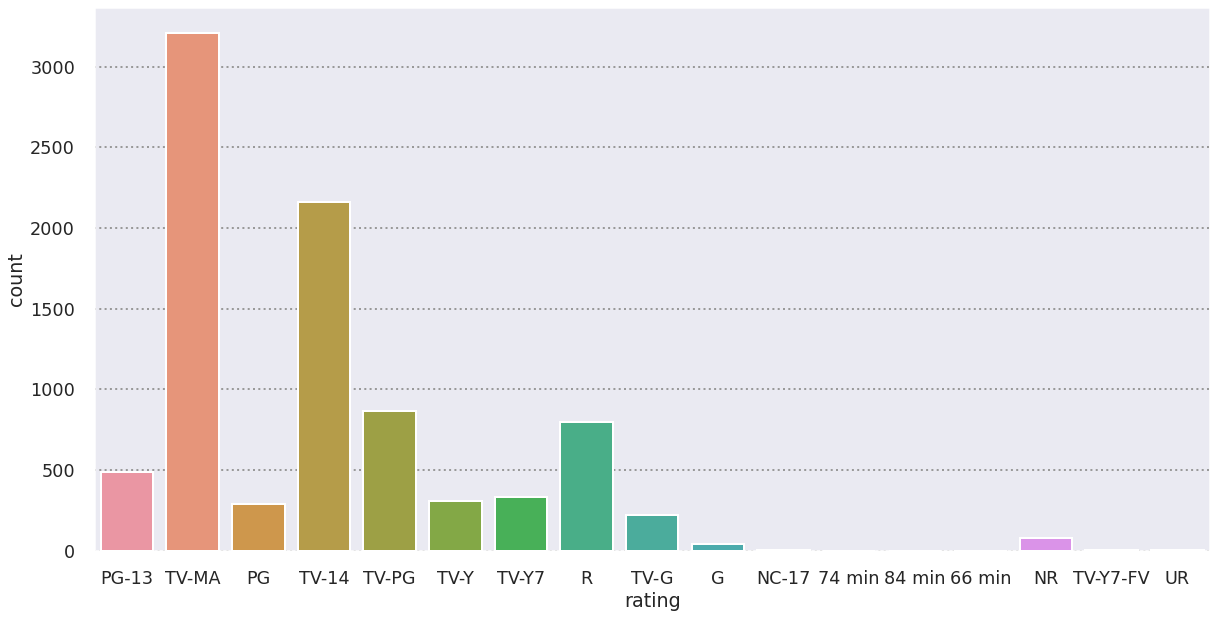

In [86]:
sns.countplot(netflix_data['rating'])
plt.show()

In [87]:
netflix_data [netflix_data['country'].isin(['India'])][netflix_data['rating'] == 'TV-MA' ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...
203,s204,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,"August 27, 2021",2016,TV-MA,124 min,"Comedies, International Movies",When an unlikely porn actor falls for a woman ...
204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...
206,s207,Movie,"LSD: Love, Sex Aur Dhokha",Dibakar Banerjee,"Nushrat Bharucha, Anshuman Jha, Neha Chauhan, ...",India,"August 27, 2021",2010,TV-MA,112 min,"Dramas, Independent Movies, International Movies",This provocative drama examines how the voyeur...
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,s8689,Movie,Waiting,Anu Menon,"Naseeruddin Shah, Kalki Koechlin, Rajat Kapoor...",India,"May 1, 2018",2015,TV-MA,94 min,"Dramas, International Movies",While visiting his comatose wife in the hospit...
8713,s8714,Movie,Welcome 2 Karachi,Ashish R. Mohan,"Arshad Warsi, Jacky Bhagnani, Lauren Gottlieb,...",India,"March 1, 2018",2015,TV-MA,124 min,"Comedies, International Movies","Denied a U.S. visa, two dim Indian men decide ..."
8762,s8763,Movie,Wrong Side Raju,Mikhil Musale,"Pratik Gandhi, Kimberley Louisa McBeath, Asif ...",India,"October 1, 2017",2016,TV-MA,140 min,"Dramas, International Movies",The life of a chauffeur and part-time bootlegg...
8769,s8770,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ..."


# Network analysis of Actors / Directors and find interesting insights

In [89]:
netflix_data['director'].nunique()

4528

In [90]:
netflix_data['cast'].nunique()

7692

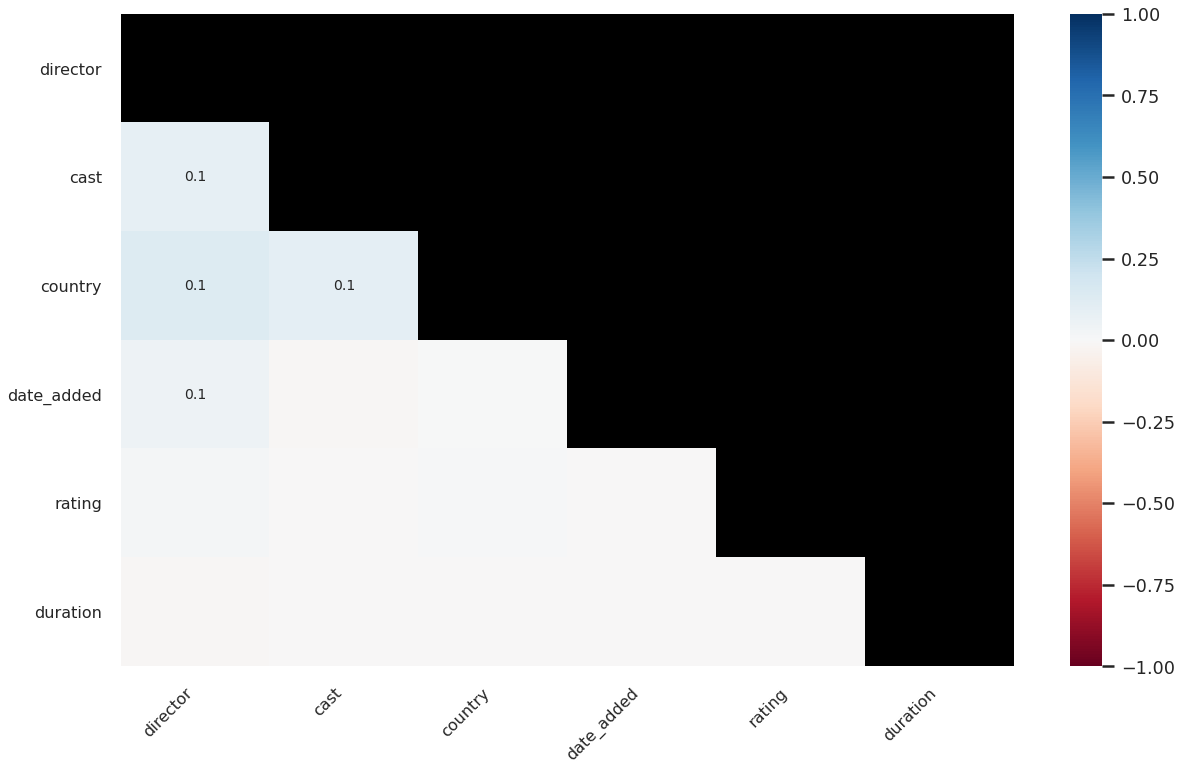

In [91]:
msno.heatmap(netflix_data)
plt.show()

# Detail analysis of dataset using profileReport

In [93]:
ProfileReport(netflix_data)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA & Data Visualization

In [94]:
netflix_data[netflix_data['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [95]:
netflix_data.drop(['director','date_added','description'],axis=1,inplace=True)

In [96]:
netflix_data.isna().sum()

show_id           0
type              0
title             0
cast            825
country         831
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [97]:
netflix_data[netflix_data['rating'].isna()]

,show_id,type,title,cast,country,release_year,rating,duration,listed_in
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",NaN,2017,NaN,37 min,Movies
6827,s6828,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2013,NaN,1 Season,"Anime Series, International TV Shows"
7312,s7313,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2015,NaN,1 Season,"Kids' TV, TV Comedies"
7537,s7538,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2015,NaN,115 min,Dramas


In [98]:
changing_nan = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}


In [99]:
for id, rate in changing_nan.items():
    netflix_data.iloc[id,6]=rate

In [100]:
netflix_data['rating'].isna().sum()

4

In [101]:
netflix_data=netflix_data[ netflix_data['cast'].notna() ]

In [102]:
netflix_data['cast'].isna().sum()

0

In [103]:
netflix_data.isna().sum()

show_id           0
type              0
title             0
cast              0
country         677
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [104]:
Counter(netflix_data['country']).most_common(1)

[('United States', 2488)]

In [105]:
netflix_data['country'].isnull().sum()

677

In [106]:
netflix_data['country']=netflix_data['country'].fillna('United States')

In [107]:
netflix_data['country'].isnull().sum()

0

In [108]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
release_year    0
rating          4
duration        3
listed_in       0
dtype: int64

In [109]:
netflix_data['main_country']=netflix_data['country'].apply(lambda x:x.split(',')[0])

In [110]:
netflix_data.sample(10)

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,main_country
4238,s4239,Movie,Sam Kinison: Family Entertainment Hour,Sam Kinison,United States,1991,TV-MA,49 min,Stand-Up Comedy,United States
5079,s5080,Movie,Alibaba Aur 40 Chor,"Dharmendra, Hema Malini, Zeenat Aman, Rolan By...","Soviet Union, India",1980,TV-14,147 min,"Action & Adventure, International Movies, Sci-...",Soviet Union
6878,s6879,Movie,"Good Night, and Good Luck","David Strathairn, Patricia Clarkson, George Cl...","United States, France, United Kingdom, Japan",2005,PG,93 min,Dramas,United States
5174,s5175,TV Show,Glitter Force Doki Doki,"Debi Derryberry, Cassandra Morris, Melissa Fah...",Japan,2017,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Japan
7385,s7386,TV Show,Mahmut & Meryem,"Aras Bulut İynemli, Eva Dedova, Fahreddin Mana...","Turkey, Azerbaijan",2013,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Turkey
1959,s1960,Movie,Enola Holmes,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...",United Kingdom,2020,PG-13,124 min,"Action & Adventure, Children & Family Movies, ...",United Kingdom
939,s940,Movie,Motu Patlu in Wonderland,"Saurav Chakraborty, Omi Sharma, Sankalp, Brian...",United States,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",United States
2566,s2567,Movie,Bennett's War,"Michael Roark, Trace Adkins, Ali Afshar, Allis...",United States,2019,PG-13,94 min,"Dramas, Sports Movies",United States
3332,s3333,Movie,Christmas Survival,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,2018,TV-MA,101 min,Comedies,United Kingdom
3797,s3798,Movie,Joy,"Anwulika Alphonsus, Mariam Precious Sanusi, An...",Austria,2019,TV-MA,101 min,"Dramas, Independent Movies, International Movies",Austria


In [111]:
netflix_data.drop('country',axis=1,inplace=True)

In [112]:
netflix_data['main_country'].value_counts()

United States     3525
India              976
United Kingdom     547
Japan              253
Canada             245
                  ... 
Paraguay             1
Jamaica              1
Iran                 1
Puerto Rico          1
Mozambique           1
Name: main_country, Length: 84, dtype: int64

In [115]:
netflix_data_us=netflix_data[netflix_data['main_country'] == 'United States']

In [116]:
netflix_data_us

,show_id,type,title,cast,release_year,rating,duration,listed_in,main_country
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",United States
5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",United States
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021,PG,91 min,Children & Family Movies,United States
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",United States
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021,PG-13,104 min,"Comedies, Dramas",United States
...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours","Dennis Quaid, Rene Russo, Sean Faris, Katija P...",2005,PG,88 min,"Children & Family Movies, Comedies",United States
8797,s8798,TV Show,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...",2016,TV-Y7,3 Seasons,Kids' TV,United States
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2007,R,158 min,"Cult Movies, Dramas, Thrillers",United States
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2009,R,88 min,"Comedies, Horror Movies",United States


In [117]:
actor_list=[(lambda x:x)(x.strip()) for x in ','.join(netflix_data_us['cast']).split(',')]

In [118]:
counter_name=Counter(actor_list).most_common(5)

In [119]:
actor_name=[(lambda actor:actor)(actor[0]) for actor in counter_name]

In [120]:
actor_name

['Julie Tejwani',
 'Rupa Bhimani',
 'Samuel L. Jackson',
 'Fred Tatasciore',
 'Andrea Libman']

In [121]:
actor_frequency=[(lambda actor: actor)(actor[1])for actor in counter_name]

In [122]:
actor_frequency

[26, 25, 23, 22, 21]

In [123]:
us_actor = pd.DataFrame({'actor_name': actor_name, 'actor_frequency' : actor_frequency},
                       columns=['actor_name', 'actor_frequency'])

In [124]:
print("Total numbers of actors in the us netflix",str(len(set(actor_list))))

Total numbers of actors in the us netflix 16328


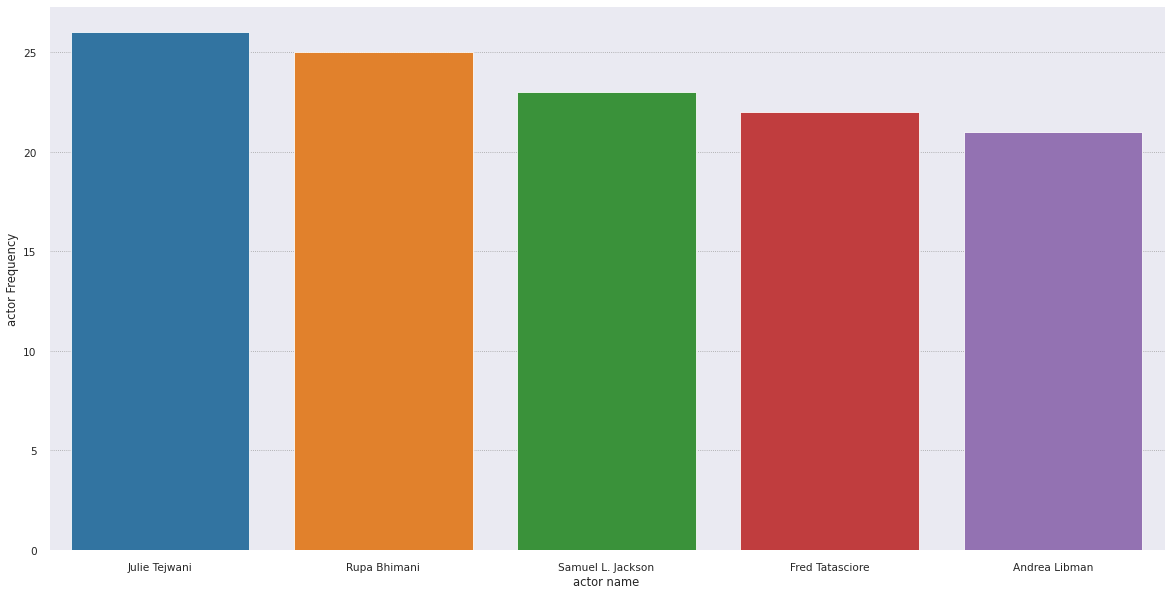

In [125]:
sns.set_context('paper',font_scale=1.2)
sns.barplot(x='actor_name',y='actor_frequency',data=us_actor)
plt.xlabel('actor name')
plt.ylabel('actor Frequency')
plt.show()

In [126]:
count_type=netflix_data.groupby('main_country').count()

In [127]:
count_type

,show_id,type,title,cast,release_year,rating,duration,listed_in
main_country,,,,,,,,
,2,2,2,2,2,2,2,2
Argentina,70,70,70,70,70,70,70,70
Australia,102,102,102,102,102,101,102,102
Austria,7,7,7,7,7,7,7,7
Bangladesh,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...
United States,3525,3525,3525,3525,3525,3524,3522,3525
Uruguay,7,7,7,7,7,7,7,7
Venezuela,1,1,1,1,1,1,1,1


In [128]:
most_country=count_type['type'].to_frame().reset_index().sort_values(by='type',ascending=False)[:10]

In [129]:
most_country

,main_country,type
79,United States,3525
29,India,976
78,United Kingdom,547
36,Japan,253
11,Canada,245
67,South Korea,208
21,France,190
69,Spain,161
44,Mexico,125
75,Turkey,111


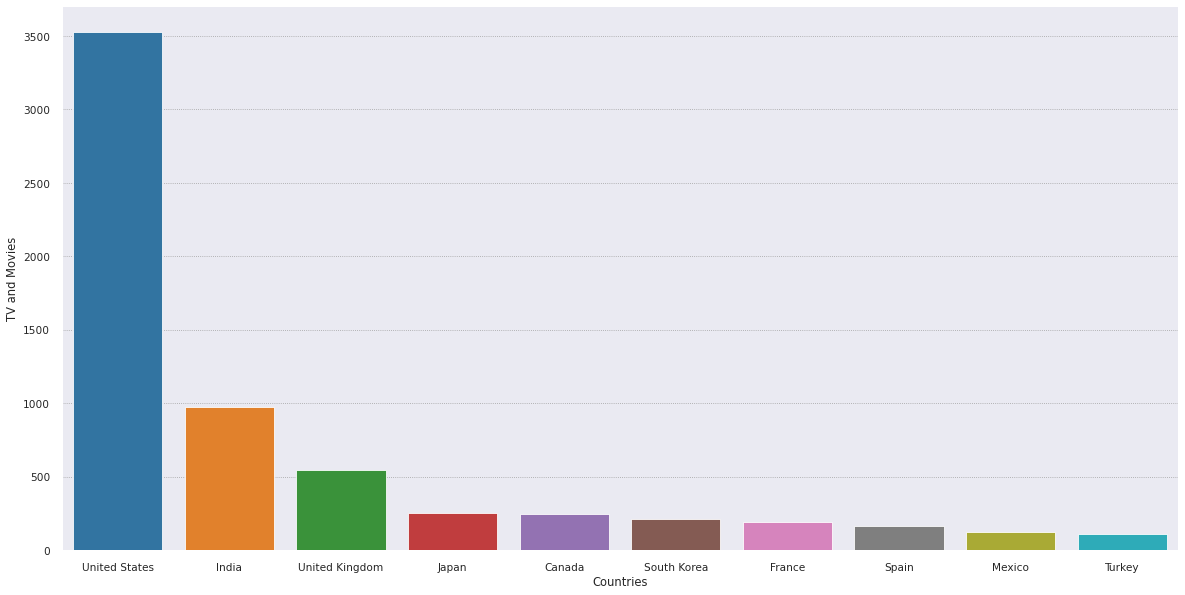

In [145]:
sns.barplot(x='main_country',y='type',data=most_country)
plt.xlabel('Countries')
plt.ylabel('TV and Movies')
plt.show()


In [131]:
top9genre=[(lambda value: value)(value.strip()) for value in ','.join(netflix_data['listed_in']).split(',')]

In [132]:
top9list=list(Counter(top9genre).most_common(9))

In [133]:
top9list

[('International Movies', 2574),
 ('Dramas', 2416),
 ('Comedies', 1662),
 ('International TV Shows', 1242),
 ('Action & Adventure', 853),
 ('TV Dramas', 757),
 ('Independent Movies', 753),
 ('Romantic Movies', 609),
 ('Children & Family Movies', 608)]

In [134]:
labels=[(lambda value : value)(value[0]) for value in top9list]
labels.append('Others')
total_genre=len(top9genre)
sizes=[(lambda value: value)(value[1]) for value in top9list]
sizes.append(total_genre -sum(sizes))


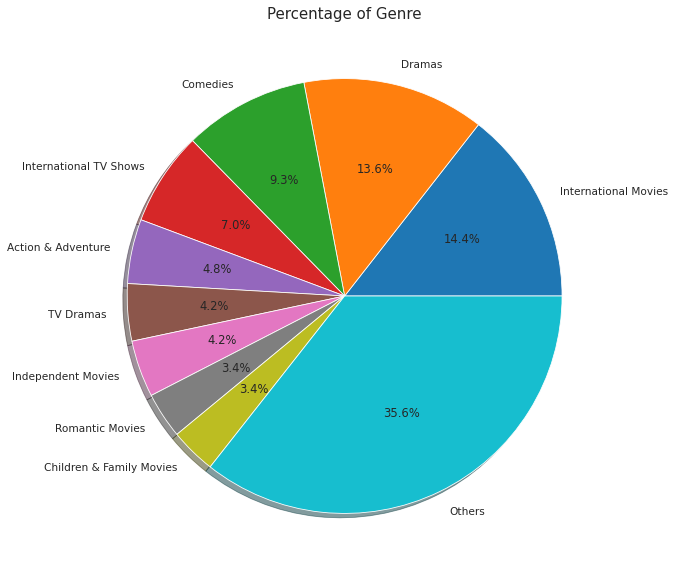

In [135]:
plt.figure(figsize=(15,10))
plt.title('Percentage of Genre',fontsize=15)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

# Does Netflix has more focus on TV Shows than movies in recent years.


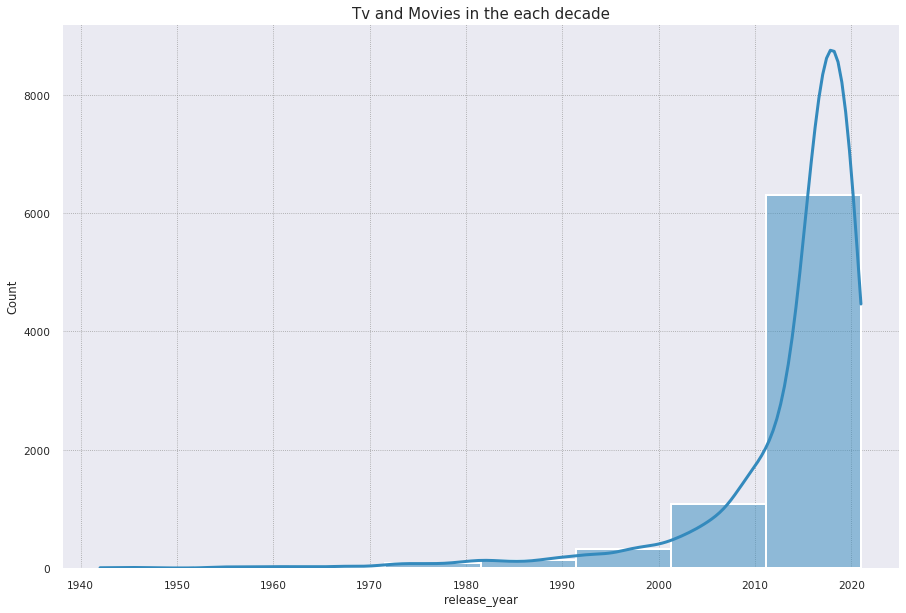

In [136]:
plt.figure(figsize=(15,10))
plt.title('Tv and Movies in the each decade', fontsize=15)
sns.set_context('poster',font_scale=0.8)
sns.histplot(netflix_data['release_year'],bins= 8,kde=True)
plt.show()

In [137]:
netflix_data_usa=netflix_data[netflix_data['main_country']=='United States']

In [138]:
netflix_data_india=netflix_data[netflix_data['main_country']=='India']

In [139]:
netflix_data_uk=netflix_data[netflix_data['main_country']=='United_kingdom']

In [140]:
def show_pie(df):
    genre=[(lambda value: value)(value.strip()) for value in ''.join(netflix_data['listed_in']).split(',')]
    netflix_list=list(Counter(genre).most_common(9))
    total_genre=len(genre)
    labels=[(lambda value:value)(value[0]) for value in netflix_list]
    labels.append('Others')
    sizes=[(lambda value:value)(value[1])for value in netflix_list]
    sizes.append(total_genre- sum(sizes))
    return sizes, labels

In [141]:
us_sizes,us_labels= show_pie(netflix_data_us)
india_sizes,india_labels=show_pie(netflix_data_india)
uk_sizes,uk_labels=show_pie(netflix_data_uk)

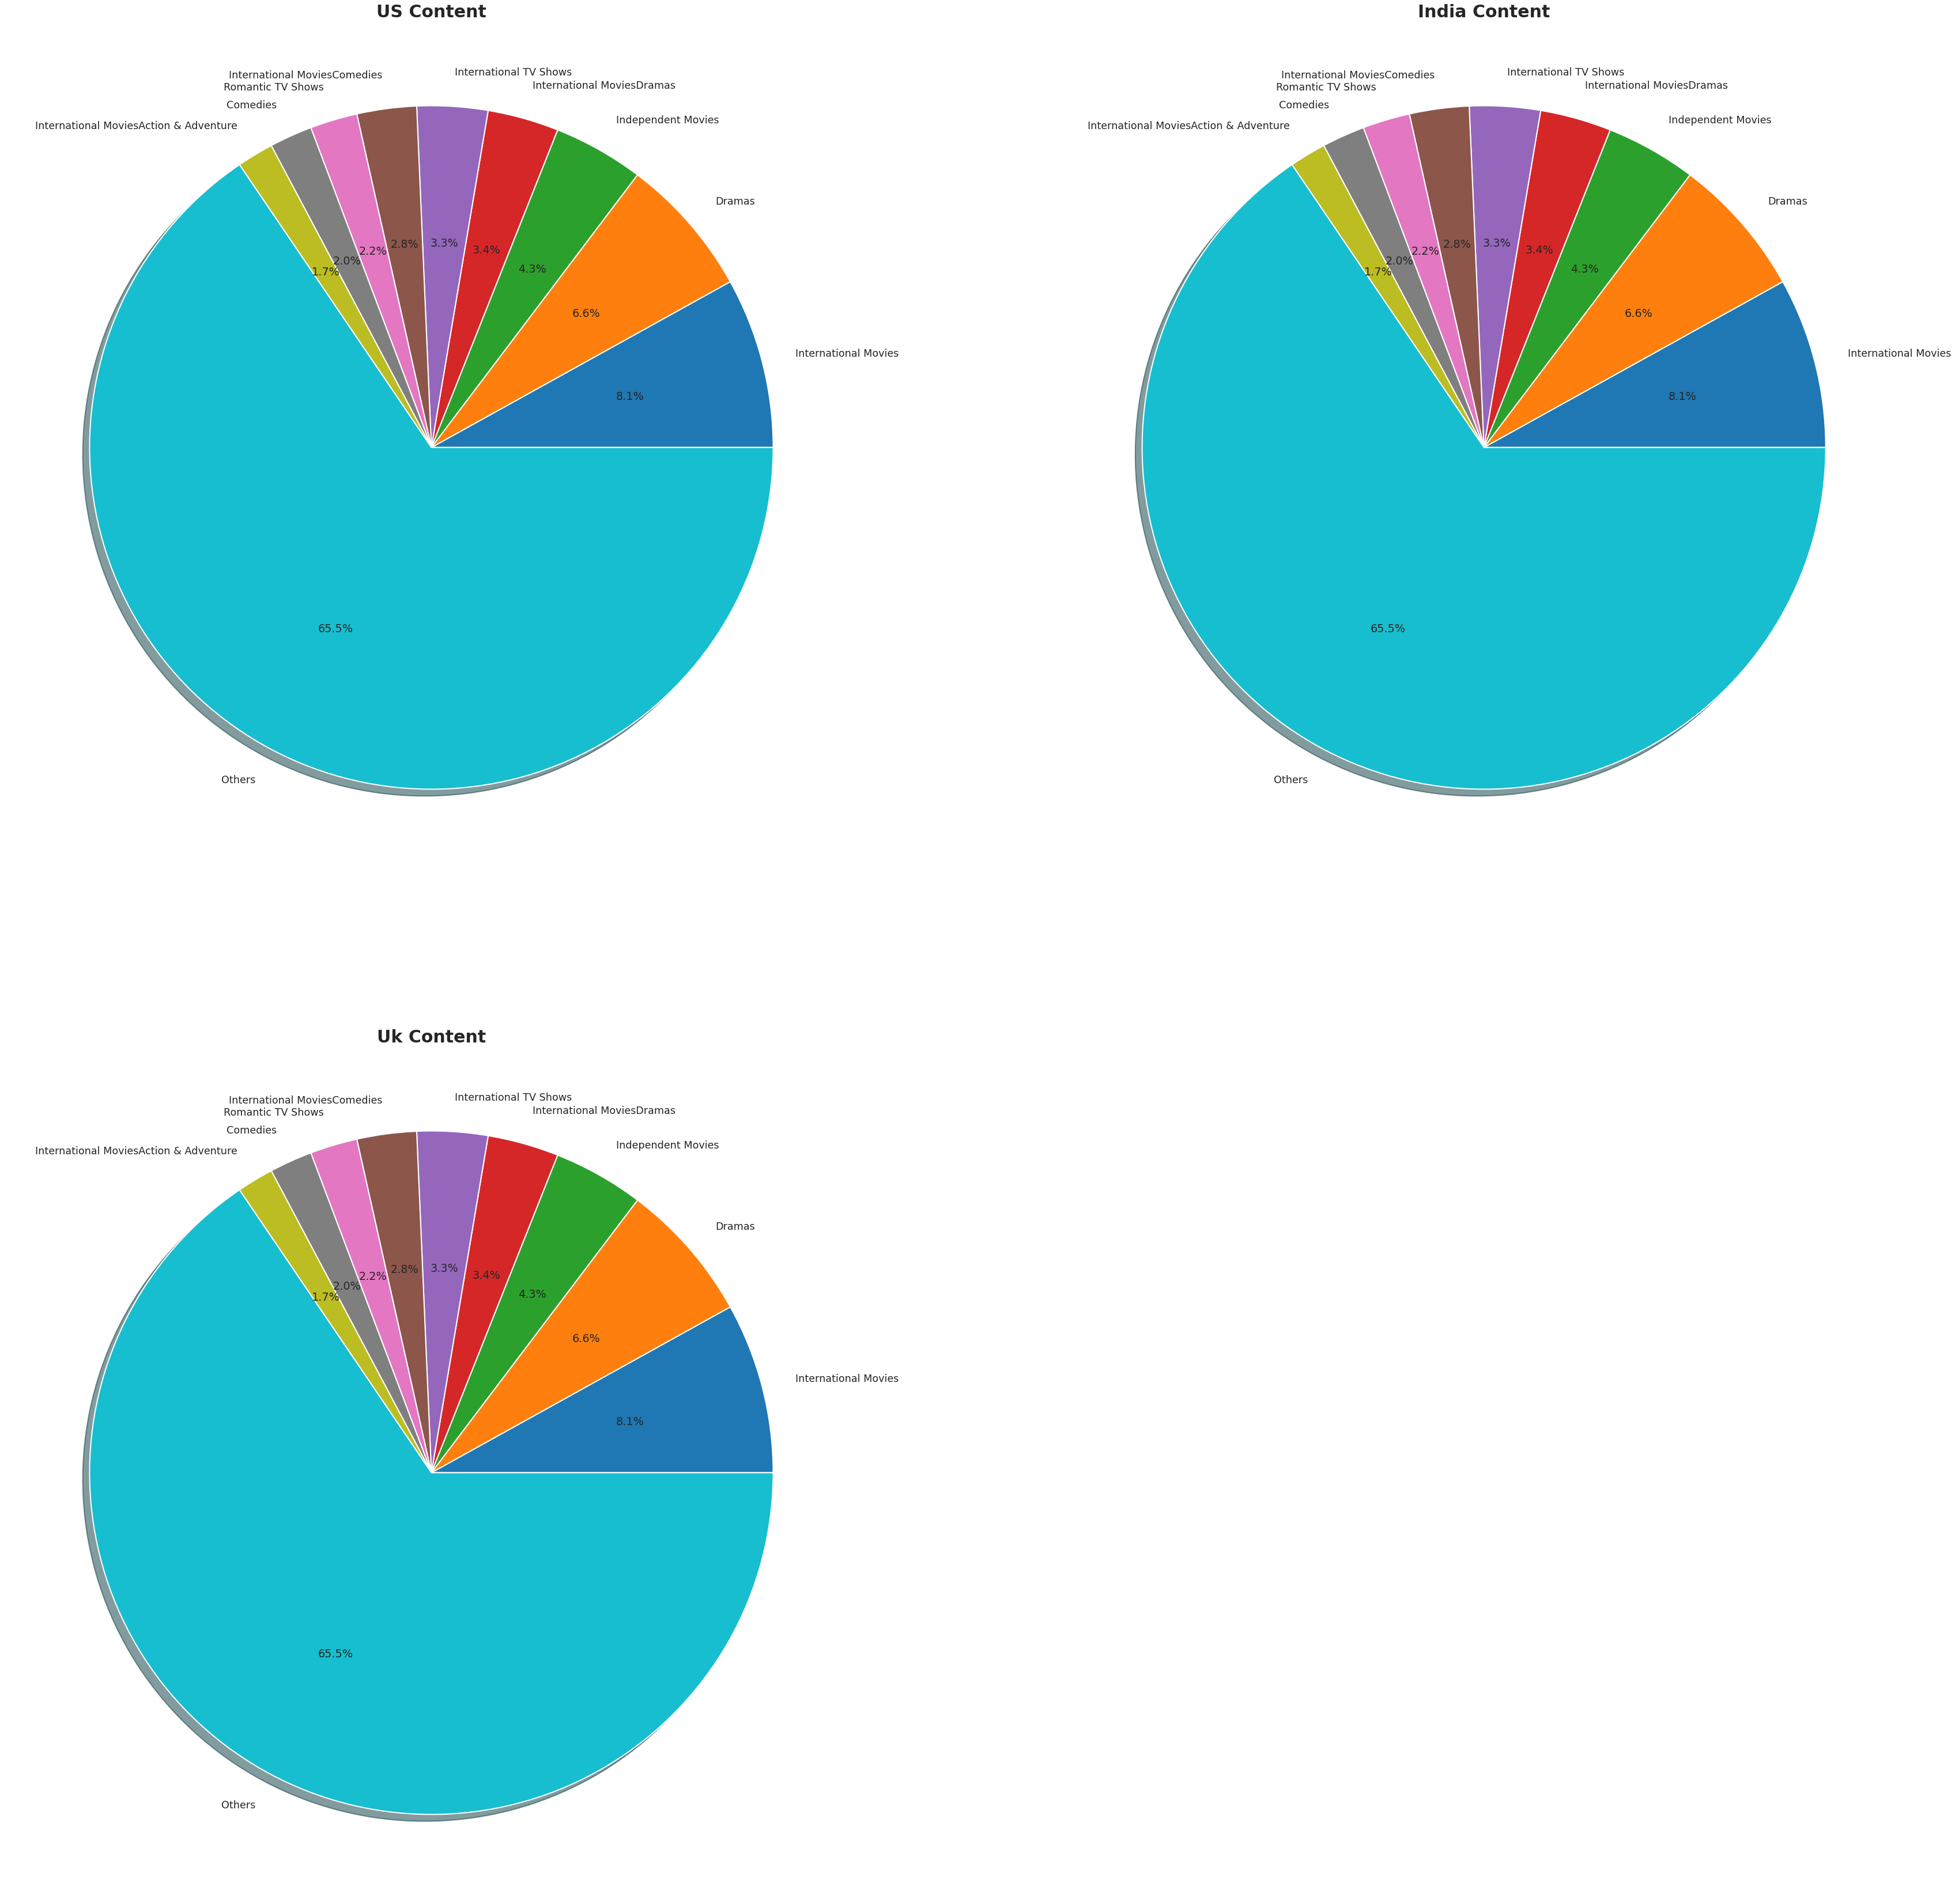

In [142]:
fig,([ax1,ax2],[ax3,ax4])=plt.subplots(2,2,figsize=(60,60))

ax1.pie(us_sizes,labels=us_labels,autopct='%1.1f%%',shadow=True)
ax1.set_title('US Content',size=30,fontweight='bold')

ax2.pie(india_sizes,labels=india_labels,autopct='%1.1f%%',shadow=True)
ax2.set_title('India Content',size=30,fontweight='bold')

ax3.pie(uk_sizes,labels=uk_labels,autopct='%1.1f%%',shadow=True)
ax3.set_title('Uk Content',size=30,fontweight='bold')

ax4.pie(uk_sizes, labels=uk_labels, autopct='%1.1f%%', shadow=True)
ax4.set_visible(False)
plt.show()

In [143]:
df_tv_show=netflix_data[netflix_data['type']=='TV Show'].groupby('release_year').count()

df_movie=netflix_data[netflix_data['type']=='Movie'].groupby('release_year').count()


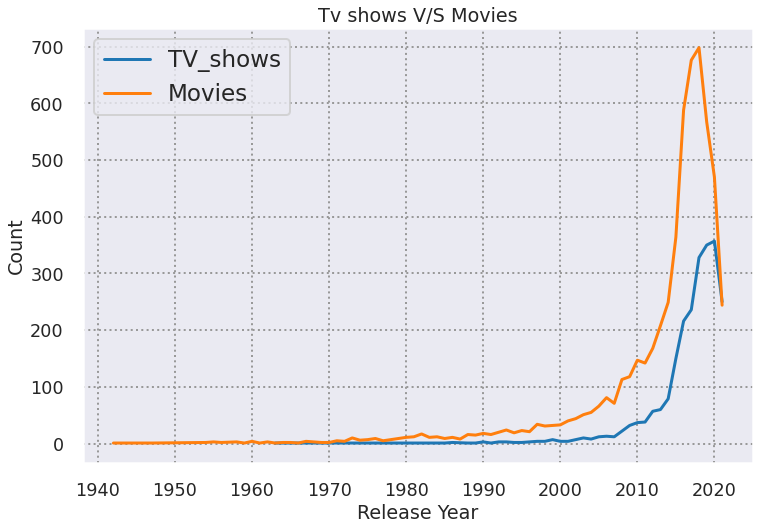

In [144]:
plt.figure(figsize=(12,8))
sns.set_context('poster',font_scale=0.8)
sns.lineplot(data=df_tv_show['show_id'],sizes=10)
sns.lineplot(data=df_movie['show_id'])
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.legend(['TV_shows', 'Movies'],fontsize='large')
plt.title('Tv shows V/S Movies')
plt.show()
